In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [74]:
company = 'NFLX'

In [75]:
#start = dt.datetime(2012,1,1)
#end = dt.datetime(2020,1,1)

start = dt.datetime(2012,1,1)
end = dt.datetime.now()

In [76]:
data = yf.download(company, start , end)

[*********************100%***********************]  1 of 1 completed


In [77]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,10.040000,10.388571,10.018571,10.320000,10.320000,29213800
2012-01-04,10.335714,11.567143,10.258571,11.492857,11.492857,100489900
2012-01-05,11.345714,11.694286,11.040000,11.328571,11.328571,86552900
2012-01-06,11.302857,12.471429,11.242857,12.327143,12.327143,125610800
2012-01-09,12.801429,14.235714,12.448571,14.025714,14.025714,214073300
...,...,...,...,...,...,...
2023-05-31,391.890015,396.260010,388.910004,395.230011,395.230011,6988000
2023-06-01,397.410004,407.519989,393.079987,403.130005,403.130005,7160100
2023-06-02,402.890015,406.579987,395.899994,400.470001,400.470001,5897300


In [78]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [79]:
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

In [80]:
import pickle as pkl

pkl.dump(scaler, open(f"{company}_scaler.pkl", "wb"))

In [11]:
scaled_data

array([[0.013099  ],
       [0.01123629],
       [0.0107556 ],
       ...,
       [0.69896347],
       [0.69343546],
       [0.70842717]])

In [81]:
prediction_days = 60

x_train = []
y_train = []

In [13]:
len(scaled_data)

2875

In [14]:
scaled_data[60 - 60:60,0]

array([0.013099  , 0.01123629, 0.0107556 , 0.00727054, 0.01108608,
       0.02202194, 0.02631817, 0.03067447, 0.02391467, 0.0200691 ,
       0.03998797, 0.05011266, 0.05329727, 0.05164489, 0.05368785,
       0.05188522, 0.05275649, 0.06240047, 0.0562716 , 0.06149918,
       0.06744779, 0.06726753, 0.07970557, 0.07928496, 0.07504883,
       0.07555956, 0.07474838, 0.06946073, 0.0706925 , 0.06570528,
       0.06660657, 0.07132341, 0.07483853, 0.07700164, 0.07018176,
       0.07450804, 0.07471835, 0.07579992, 0.07844374, 0.07252516,
       0.09052125, 0.08700615, 0.08301036, 0.06810875, 0.07631065,
       0.078624  , 0.07898453, 0.07808321, 0.10076611, 0.08823795,
       0.09631965, 0.0959291 , 0.10004507, 0.10521255, 0.10512242,
       0.10136697, 0.10569325, 0.11137151, 0.10614391, 0.10623404])

In [15]:
scaled_data[60, 0]

0.09842271754696069

In [82]:
for x in range(prediction_days, len(scaled_data)) :
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [83]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
x_train.shape

(2815, 60, 1)

In [84]:
model = tf.keras.models.Sequential()

In [85]:
model.add(tf.keras.layers.LSTM(units = 128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(units = 128, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(units = 128))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1))

In [87]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="mean_absolute_error", metrics=["mae"])

In [88]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
88/88 [==============================] - 18s 153ms/step - loss: 0.0534 - mae: 0.0534
Epoch 2/25
88/88 [==============================] - 13s 147ms/step - loss: 0.0389 - mae: 0.0389
Epoch 3/25
88/88 [==============================] - 13s 149ms/step - loss: 0.0334 - mae: 0.0334
Epoch 4/25
88/88 [==============================] - 13s 147ms/step - loss: 0.0323 - mae: 0.0323
Epoch 5/25
88/88 [==============================] - 13s 151ms/step - loss: 0.0301 - mae: 0.0301
Epoch 6/25
88/88 [==============================] - 13s 148ms/step - loss: 0.0302 - mae: 0.0302
Epoch 7/25
88/88 [==============================] - 13s 147ms/step - loss: 0.0291 - mae: 0.0291
Epoch 8/25
88/88 [==============================] - 13s 150ms/step - loss: 0.0276 - mae: 0.0276
Epoch 9/25
88/88 [==============================] - 14s 154ms/step - loss: 0.0292 - mae: 0.0292
Epoch 10/25
88/88 [==============================] - 14s 155ms/step - loss: 0.0273 - mae: 0.0273
Epoch 11/25
88/88 [====================

In [89]:
model.save(f"{company}_model.h5")

In [24]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [25]:
test_data = yf.download(company, test_start , test_end)

[*********************100%***********************]  1 of 1 completed


In [26]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,231.000000,234.639999,230.160004,234.320007,215.880478,3736300
2020-01-03,231.600006,232.610001,230.300003,231.580002,213.356094,2274500
2020-01-06,229.929993,234.020004,229.490005,233.949997,215.539581,3329300
2020-01-07,235.000000,237.770004,234.759995,235.490005,216.958420,5255200
2020-01-08,235.679993,239.750000,235.479996,237.759995,219.049744,3564700
...,...,...,...,...,...,...
2023-06-01,324.510010,324.679993,314.019989,316.399994,316.399994,3339700
2023-06-02,318.239990,325.269989,317.049988,323.649994,323.649994,3987700
2023-06-05,322.929993,323.489990,320.320007,321.809998,321.809998,1462900


In [23]:
actual_prices = test_data["Close"].values

In [24]:
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis = 0)

In [25]:
total_dataset

Date
2012-01-03      8.951500
2012-01-04      8.875500
2012-01-05      8.880500
2012-01-06      9.130500
2012-01-09      8.928000
                 ...    
2023-05-24    116.750000
2023-05-25    115.000000
2023-05-26    120.110001
2023-05-30    121.660004
2023-05-31    120.061996
Name: Close, Length: 2871, dtype: float64

In [26]:
len(total_dataset)

2871

In [27]:
len(test_data)

859

In [28]:
len(total_dataset)-len(test_data)-prediction_days

1952

In [29]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

In [30]:
model_inputs

array([ 86.63300323,  85.27549744,  86.09950256,  86.01300049,
        86.59600067,  86.82150269,  88.3690033 ,  88.87149811,
        89.37400055,  87.87550354,  89.28299713,  88.28649902,
        88.10849762,  89.03900146,  88.0664978 ,  88.85399628,
        88.13549805,  88.99949646,  88.83300018,  89.5719986 ,
        90.23300171,  90.08550262,  89.78849792,  89.41000366,
        89.29399872,  88.58249664,  88.90000153,  87.65550232,
        87.73000336,  86.97450256,  87.62650299,  87.63950348,
        87.27649689,  86.73549652,  87.28600311,  88.69200134,
        89.84700012,  90.92549896,  90.04000092,  89.08000183,
        88.4980011 ,  88.03450012,  87.02400208,  87.58000183,
        87.47550201,  86.96050262,  87.43599701,  88.01650238,
        88.04699707,  88.46050262,  89.53299713,  89.20149994,
        89.61399841,  89.32499695,  89.65000153,  89.46050262,
        93.43849945,  93.48999786,  92.34449768,  92.39199829,
        94.90049744,  93.74849701,  95.14399719,  95.34

In [31]:
model_inputs.shape

(919,)

In [32]:
model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [33]:
x_test = []

for x in range(prediction_days, len(model_inputs)) :
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [34]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
x_test.shape

(859, 60, 1)

In [36]:
predicted_prices = model.predict(x_test)

27/27 [==============================] - 3s 62ms/step


In [37]:
predicted_prices = scaler.inverse_transform(predicted_prices)

In [38]:
predicted_prices.shape

(859, 1)

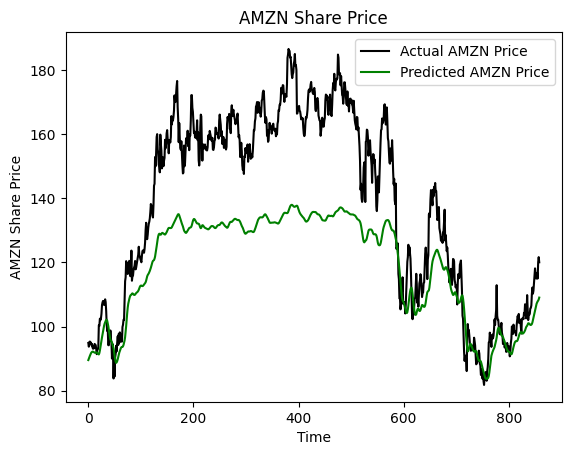

In [39]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [40]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [42]:
pred = model.predict(real_data)
pred = scaler.inverse_transform(pred)
pred

1/1 [==============================] - 0s 38ms/step


array([[109.64242]], dtype=float32)

In [43]:
new_df = data.filter(["Close"])
last_60_days = new_df[-60:].values
last_60_days = scaler.transform(last_60_days)

x_pred_tomorrow = []
x_pred_tomorrow.append(last_60_days)
x_pred_tomorrow = np.array(x_pred_tomorrow)
x_pred_tomorrow = np.reshape(x_pred_tomorrow, (x_pred_tomorrow.shape[0], x_pred_tomorrow.shape[1], 1))

tomorrow_price = model.predict(x_pred_tomorrow)
tomorrow_price = scaler.inverse_transform(tomorrow_price)
print(tomorrow_price)

1/1 [==============================] - 1s 861ms/step
[[167.6137]]
